In [1]:
word  = open('names.txt','r').read().splitlines()

In [2]:
word[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
b = {}
for w in word[:3]: # word by word
    w = ['<S>']+list(w)+['<E>']
    for ch1 ,ch2 in zip(w,w[1:]): # iter over string char by char 
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
        print(ch1,'-->',ch2)

<S> --> e
e --> m
m --> m
m --> a
a --> <E>
<S> --> o
o --> l
l --> i
i --> v
v --> i
i --> a
a --> <E>
<S> --> a
a --> v
v --> a
a --> <E>


In [4]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [18]:
b = {}
for w in word: # word by word
    w = ['<S>']+list(w)+['<E>']
    for ch1 ,ch2 in zip(w,w[1:]): # iter over string char by char 
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1
        # print(ch1,'-->',ch2)

In [19]:
b = sorted(list(b.items()),key= lambda item: -item[1])
b[0:2]

[(('n', '<E>'), 6763), (('a', '<E>'), 6640)]

### Map the bigram to pytorch


In [20]:
import torch

N = torch.zeros((27,27),dtype=torch.int32) 

In [21]:
# index all char 
chars = sorted(set(''.join(word)))
choin  = {c:i+1 for i,c in enumerate(chars)} 
# hoin['<S>'] = 26
# choin['<E>'] = 27
choin['.'] = 0

inoch = {i+1:c for i,c in enumerate(chars)} 
# inoch[26] = '<S>'
# inoch[27] = '<E>'
inoch[0] = '.'


In [22]:
for w in word: # word by word
    w = ['.']+list(w)+['.']
    for ch1 ,ch2 in zip(w,w[1:]): # iter over string char by char 
        idx1,idx2 = choin[ch1] , choin[ch2] 
        N[idx1,idx2] += 1  

In [23]:
# Note N[0,0] is Still pytorch tensoer 
# N[0,0].item() is int

In [ ]:
import matplotlib.pyplot as plt


plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = inoch[i] + inoch[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

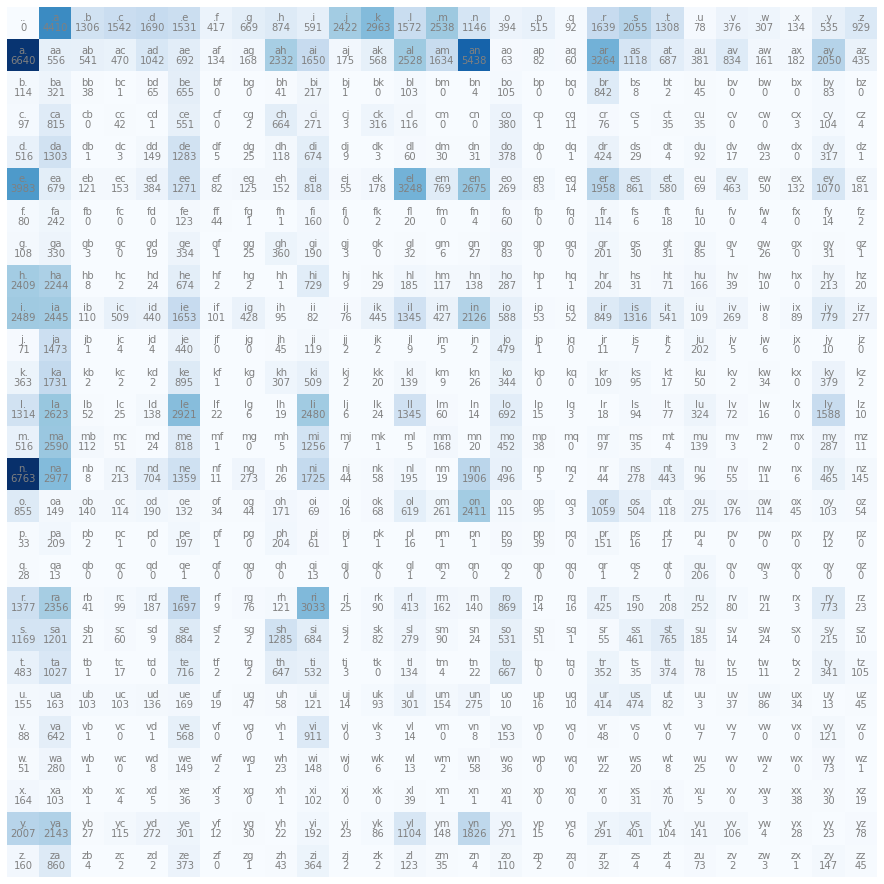


In [24]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [30]:
# Make Probability distribution
p = N[0].float()
p /= N[0].sum()
p , 'The sum should by 1 ',p.sum().item()

(tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]),
 'The sum should by 1 ',
 1.0)

In [35]:
SEED_NUMBER = 2147483647
g = torch.Generator().manual_seed(SEED_NUMBER) # just set seed number to fix output
p = torch.rand(3,generator=g) #take there smaple for the Probability distribution
p = p / p.sum() #Normalize the smaple Probability
p 

tensor([0.6064, 0.3033, 0.0903])

In [61]:
l = torch.multinomial(p,num_samples=20,replacement=True,generator=g) 
# Note 
# 1. luckily first one with idex 0 have higer Probability occured 13
# 2. idex 1 have higer Probability occured 6
# 3. idex 2 have higer Probability occured 1
l

tensor([0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1])

WE Stoped at min 32
